# Lab Activity Week 6

**Homework** Anythin you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

In [9]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time
from IPython import display

### Step 1: Aquiring data

- Collect data from your weather and air quality sensors together (in the same script) for 5 minutes, taking a reading every second. 
- Make the name of the file saving the data something that is unique each time data is recorded. 
   - **HINT:** You can include the time as part of the file name, for example.
- Upload your new data to your git repository on GitHub and update the version of your respository on your laptop

### Step 2: Acquiring outdoor data
- Restart your raspberry pi system, powering it with the supplied batteries, rather than the power adaptor.
- Add a time delay to the start of your data acquisition script (as an optional user input)
- Start your data aquisition to again collect data for 5 minutes, taking readings every second, but this time with an initial ~2 minute delay (so it should run for ~7 minutes total).
- Take the whole system outdoors and wait there for the 5 minutes of data acquisition to complete.
- At your stations, again push your new data to your git repository on GitHub

In [16]:
insideData = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Week5Data.csv")
outsideData = pd.read_csv(r"C:\Users\prana\OneDrive\Documents\GitHub\E11-Lab-Besties\Week5ExtraOutsideData.csv")
# will remove around 40 rows in the beginning and around 20 at the end as these were values recorded while inside the building since this outside data was taken without time delay last week
# removing PM10 standard values of 0 gets us outside values as we recorded the inside values to be 0
pureOutside = outsideData[outsideData['PM10 Standard (mirogram/m^3)']>0]
# for some reason display() isn't working
insideData
#pureOutside

,Time,Temperature (C),Gas (ohms),Humidity (%),Pressure (hPa),Altitude (m),PM10 Standard (mirogram/m^3),PM25 Standard (mirogram/m^3),PM100 Standard (mirogram/m^3),Unnamed: 9
0,1.676505e+09,42.818281,26984,2.468837,1011.101342,17.904426,0,0,0,NaN
1,1.676505e+09,42.832539,36850,2.431234,1011.097013,17.940529,0,0,0,NaN
2,1.676505e+09,42.849922,44127,2.393670,1011.083191,18.055801,0,0,0,NaN
3,1.676505e+09,42.873164,49568,2.379735,1011.076949,18.107861,0,0,0,NaN
4,1.676505e+09,42.896992,53701,2.361090,1011.075269,18.121872,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
248,1.676505e+09,44.928242,148810,1.806161,1011.137275,17.604750,0,0,0,NaN
249,1.676505e+09,44.923750,148286,1.815575,1011.133729,17.634319,0,0,0,NaN
250,1.676505e+09,44.921211,148417,1.810835,1011.136943,17.607513,0,0,0,NaN
251,1.676505e+09,44.915547,148417,1.801353,1011.136979,17.607213,0,0,0,NaN


### Step 3: Plotting indoor data
- Create a new Jupyter notebook and load (using pandas, for example) the data you now have from your device.
- Plot each type of data as a frequency distribution (histogram) with appropriate binning - meaning the distribution shows a good level of detail but does not have binning artifacts
- Using the mean and standard deviation of each set of data, does any of the data you have recorded look like it is well described by a normal distribution?
  - Using the mean and standard deviation, try plotting a Gaussian function along with each of your frequency distributions and see how well they match.

1676505022.2706802
87.08629180186902


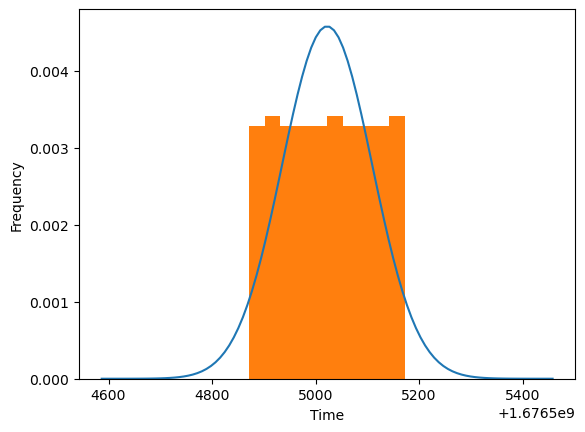

44.31354820281616
0.6666705355722945


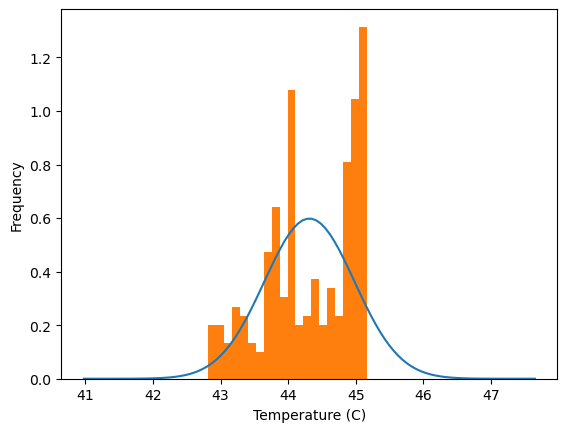

117165.7233201581
24844.247099464672


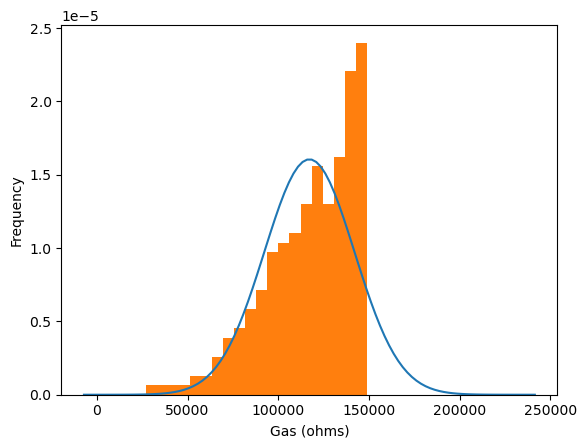

1.9783302939849738
0.23219233815054505


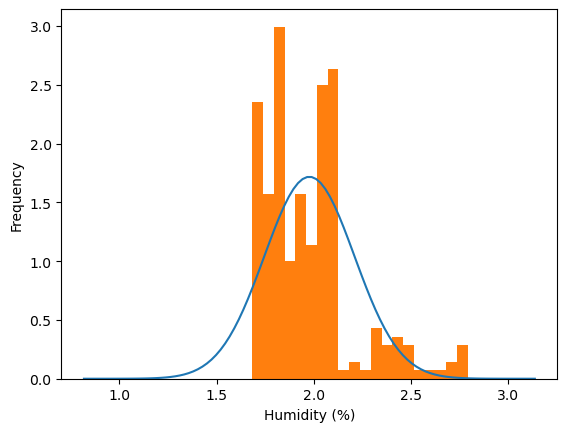

1011.1166266144236
0.0228090626197932


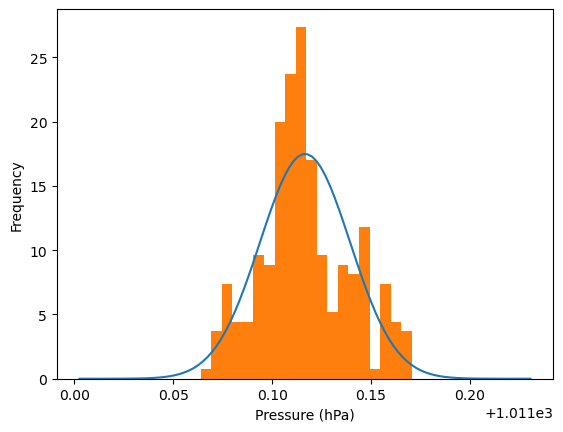

17.776953183582457
0.19022493818825575


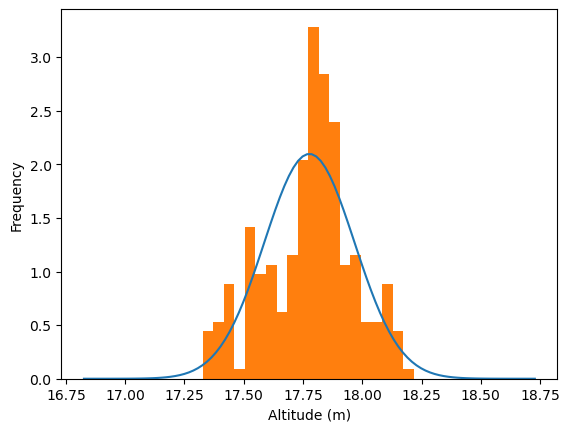

0.0
0.0


C:\Users\prana\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


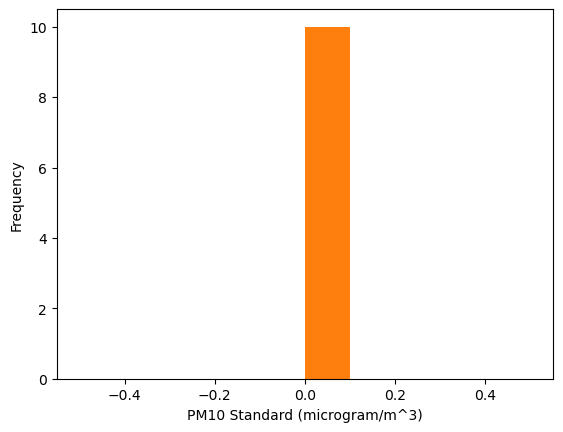

0.0
0.0


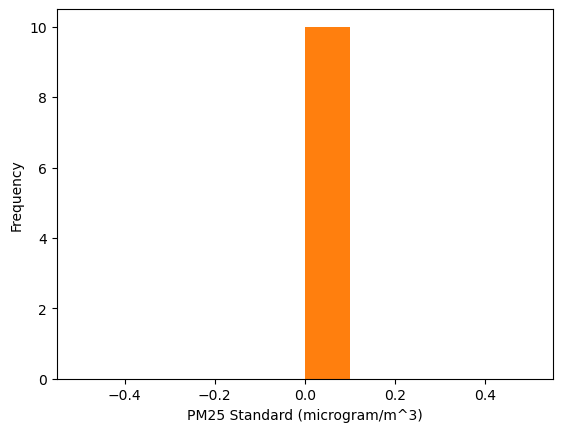

0.0
0.0


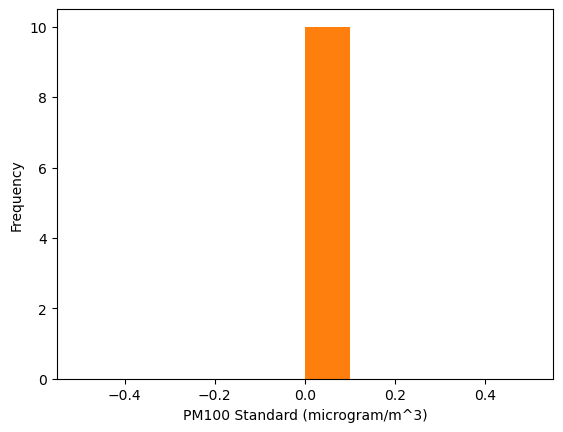

In [11]:
# time
# Gaussian, mean, and std setup
mu_itime = np.mean(insideData["Time"])
sigma_itime = np.std(insideData["Time"])
print(mu_itime)
print(sigma_itime)
x = np.linspace(mu_itime - 5*sigma_itime, mu_itime + 5*sigma_itime, 100)
y=norm.pdf(x, mu_itime, sigma_itime)

plt.plot(x, y)
plt.hist(insideData["Time"], density=True)
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

# temp
mu_itemp = np.mean(insideData["Temperature (C)"])
sigma_itemp = np.std(insideData["Temperature (C)"])
print(mu_itemp)
print(sigma_itemp)
x = np.linspace(mu_itemp - 5*sigma_itemp, mu_itemp + 5*sigma_itemp, 100)
y=norm.pdf(x, mu_itemp, sigma_itemp)

plt.plot(x, y)
plt.hist(insideData["Temperature (C)"], bins=20, density=True)
plt.ylabel('Frequency')
plt.xlabel('Temperature (C)')
plt.show()

# gas
mu_igas = np.mean(insideData["Gas (ohms)"])
sigma_igas = np.std(insideData["Gas (ohms)"])
print(mu_igas)
print(sigma_igas)
x = np.linspace(mu_igas - 5*sigma_igas, mu_igas + 5*sigma_igas, 100)
y=norm.pdf(x, mu_igas, sigma_igas)

plt.plot(x, y)
plt.hist(insideData["Gas (ohms)"], bins =20, density=True)
plt.ylabel('Frequency')
plt.xlabel('Gas (ohms)')
plt.show()

# humidity
mu_ihum = np.mean(insideData["Humidity (%)"])
sigma_ihum = np.std(insideData["Humidity (%)"])
print(mu_ihum)
print(sigma_ihum)
x = np.linspace(mu_ihum - 5*sigma_ihum, mu_ihum + 5*sigma_ihum, 100)
y=norm.pdf(x, mu_ihum, sigma_ihum)

plt.plot(x, y)
plt.hist(insideData["Humidity (%)"], bins=20, density=True)
plt.ylabel('Frequency')
plt.xlabel('Humidity (%)')
plt.show()

# pressure
mu_ipress = np.mean(insideData["Pressure (hPa)"])
sigma_ipress = np.std(insideData["Pressure (hPa)"])
print(mu_ipress)
print(sigma_ipress)
x = np.linspace(mu_ipress - 5*sigma_ipress, mu_ipress + 5*sigma_ipress, 100)
y=norm.pdf(x, mu_ipress, sigma_ipress)

plt.plot(x, y)
plt.hist(insideData["Pressure (hPa)"], bins =20, density=True)
plt.ylabel('Frequency')
plt.xlabel('Pressure (hPa)')
plt.show()

# altitude
mu_ialt = np.mean(insideData["Altitude (m)"])
sigma_ialt = np.std(insideData["Altitude (m)"])
print(mu_ialt)
print(sigma_ialt)
x = np.linspace(mu_ialt - 5*sigma_ialt, mu_ialt + 5*sigma_ialt, 100)
y=norm.pdf(x, mu_ialt, sigma_ialt)

plt.plot(x, y)
plt.hist(insideData["Altitude (m)"], bins =20, density=True)
plt.ylabel('Frequency')
plt.xlabel('Altitude (m)')
plt.show()

# pm10
mu_ipm10 = np.mean(insideData["PM10 Standard (mirogram/m^3)"])
sigma_ipm10 = np.std(insideData["PM10 Standard (mirogram/m^3)"])
print(mu_ipm10)
print(sigma_ipm10)
x = np.linspace(mu_ipm10 - 5*sigma_ipm10, mu_ipm10 + 5*sigma_ipm10, 100)
y=norm.pdf(x, mu_ipm10, sigma_ipm10)

plt.plot(x, y)
plt.hist(insideData["PM10 Standard (mirogram/m^3)"], density=True)
plt.ylabel('Frequency')
plt.xlabel('PM10 Standard (microgram/m^3)')
plt.show()

# pm 25
mu_ipm25 = np.mean(insideData["PM25 Standard (mirogram/m^3)"])
sigma_ipm25 = np.std(insideData["PM25 Standard (mirogram/m^3)"])
print(mu_ipm25)
print(sigma_ipm25)
x = np.linspace(mu_ipm25 - 5*sigma_ipm25, mu_ipm25 + 5*sigma_ipm25, 100)
y=norm.pdf(x, mu_ipm25, sigma_ipm25)

plt.plot(x, y)
plt.hist(insideData["PM25 Standard (mirogram/m^3)"], density=True)
plt.ylabel('Frequency')
plt.xlabel('PM25 Standard (microgram/m^3)')
plt.show()

# pm100
mu_ipm100 = np.mean(insideData["PM100 Standard (mirogram/m^3)"])
sigma_ipm100 = np.std(insideData["PM100 Standard (mirogram/m^3)"])
print(mu_ipm100)
print(sigma_ipm100)
x = np.linspace(mu_ipm100 - 5*sigma_ipm100, mu_ipm100 + 5*sigma_ipm100, 100)
y=norm.pdf(x, mu_ipm100, sigma_ipm100)

plt.plot(x, y)
plt.hist(insideData["PM100 Standard (mirogram/m^3)"], density=True)
plt.ylabel('Frequency')
plt.xlabel('PM100 Standard (microgram/m^3)')
plt.show()

The histograms of pressure and altitude could line up nicely with the Gaussian distribution

### Step 4: Comparing Indoor vs Outdoor data
- Produce the same plots as in Step 2 for your new outdoor data
- Now produce plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Comment on your results
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

1676507546.8845665
67.94115912957167


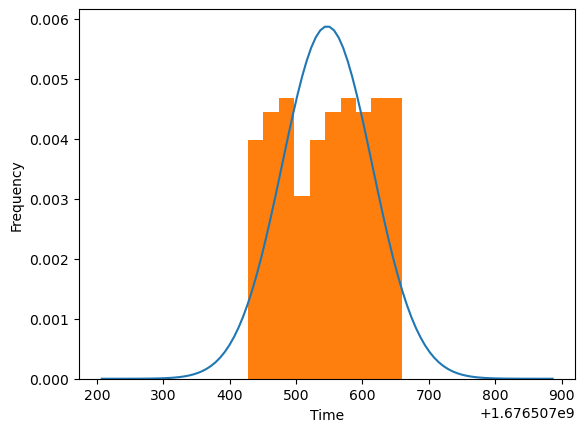

25.990463018002714
4.518215029384407


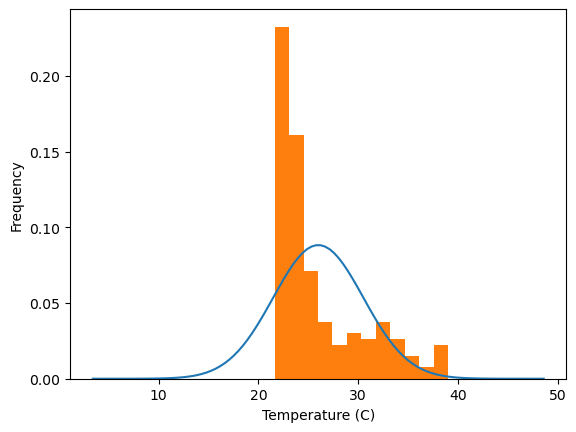

170522.98369565216
10288.955402082296


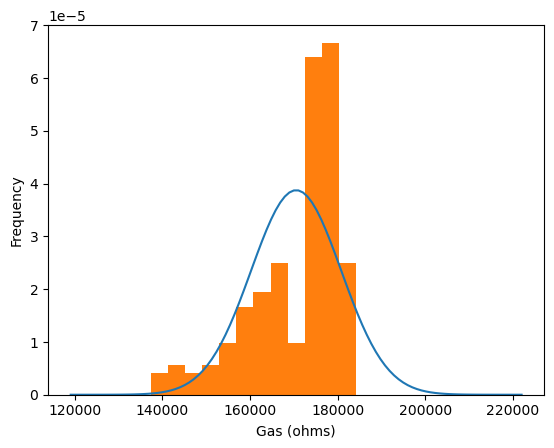

8.919791083627963
2.911056283127058


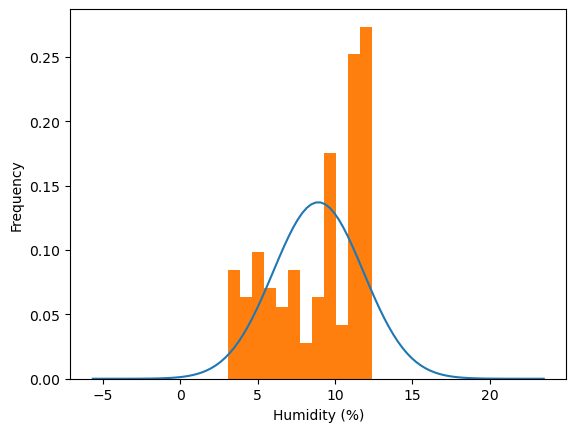

1011.6001447856146
0.05281940508020675


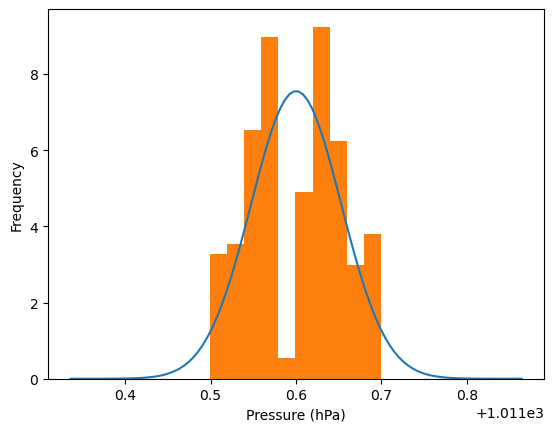

13.74524587717723
0.4403389391238763


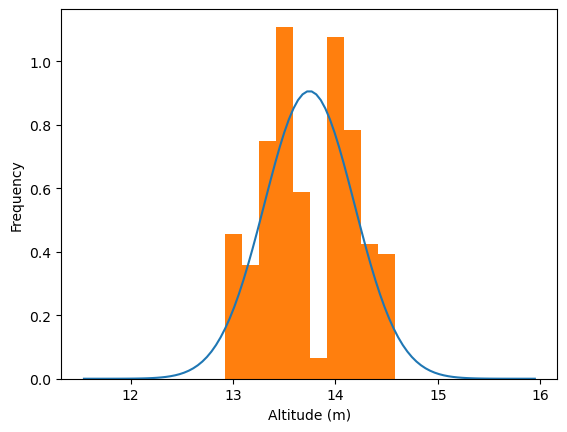

1.8967391304347827
1.325006241737267


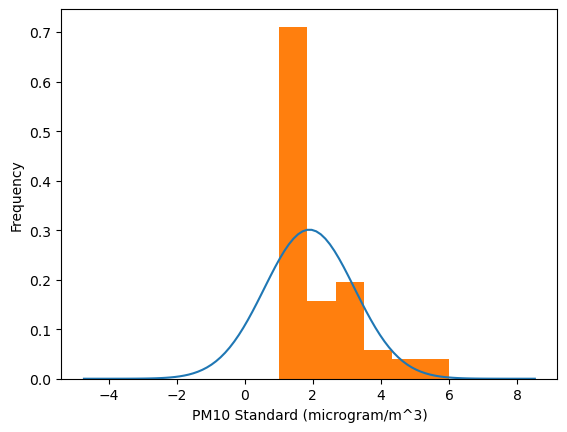

3.244565217391304
2.411470060863777


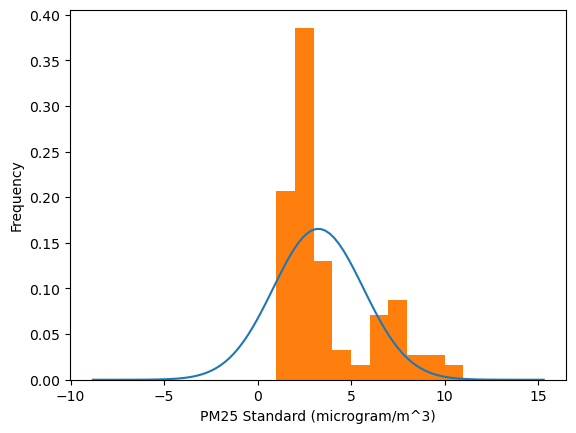

3.4130434782608696
2.3917983679424664


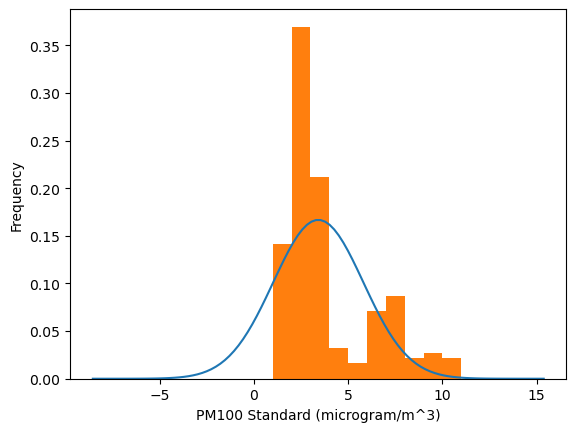

In [12]:
##### Outdoors code
# time
# Gaussian, mean, and std setup
mu_otime = np.mean(pureOutside["Time"])
sigma_otime = np.std(pureOutside["Time"])
print(mu_otime)
print(sigma_otime)
x = np.linspace(mu_otime - 5*sigma_otime, mu_otime + 5*sigma_otime, 100)
y=norm.pdf(x, mu_otime, sigma_otime)

plt.plot(x, y)
plt.hist(pureOutside["Time"], density=True)
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

# temp
mu_otemp = np.mean(pureOutside["Temperature (C)"])
sigma_otemp = np.std(pureOutside["Temperature (C)"])
print(mu_otemp)
print(sigma_otemp)
x = np.linspace(mu_otemp - 5*sigma_otemp, mu_otemp + 5*sigma_otemp, 100)
y=norm.pdf(x, mu_otemp, sigma_otemp)

plt.plot(x, y)
plt.hist(pureOutside["Temperature (C)"], bins=12, density=True)
plt.ylabel('Frequency')
plt.xlabel('Temperature (C)')
plt.show()

# gas
mu_ogas = np.mean(pureOutside["Gas (ohms)"])
sigma_ogas = np.std(pureOutside["Gas (ohms)"])
print(mu_ogas)
print(sigma_ogas)
x = np.linspace(mu_ogas - 5*sigma_ogas, mu_ogas + 5*sigma_ogas, 100)
y=norm.pdf(x, mu_ogas, sigma_ogas)

plt.plot(x, y)
plt.hist(pureOutside["Gas (ohms)"], bins =12, density=True)
plt.ylabel('Frequency')
plt.xlabel('Gas (ohms)')
plt.show()

# humidity
mu_ohum = np.mean(pureOutside["Humidity (%)"])
sigma_ohum = np.std(pureOutside["Humidity (%)"])
print(mu_ohum)
print(sigma_ohum)
x = np.linspace(mu_ohum - 5*sigma_ohum, mu_ohum + 5*sigma_ohum, 100)
y=norm.pdf(x, mu_ohum, sigma_ohum)

plt.plot(x, y)
plt.hist(pureOutside["Humidity (%)"], bins=12, density=True)
plt.ylabel('Frequency')
plt.xlabel('Humidity (%)')
plt.show()

# pressure
mu_opress = np.mean(pureOutside["Pressure (hPa)"])
sigma_opress = np.std(pureOutside["Pressure (hPa)"])
print(mu_opress)
print(sigma_opress)
x = np.linspace(mu_opress - 5*sigma_opress, mu_opress + 5*sigma_opress, 100)
y=norm.pdf(x, mu_opress, sigma_opress)

plt.plot(x, y)
plt.hist(pureOutside["Pressure (hPa)"], density=True)
plt.ylabel('Frequency')
plt.xlabel('Pressure (hPa)')
plt.show()

# altitude
mu_oalt = np.mean(pureOutside["Altitude (m)"])
sigma_oalt = np.std(pureOutside["Altitude (m)"])
print(mu_oalt)
print(sigma_oalt)
x = np.linspace(mu_oalt - 5*sigma_oalt, mu_oalt + 5*sigma_oalt, 100)
y=norm.pdf(x, mu_oalt, sigma_oalt)

plt.plot(x, y)
plt.hist(pureOutside["Altitude (m)"], density=True)
plt.ylabel('Frequency')
plt.xlabel('Altitude (m)')
plt.show()

# pm10
mu_opm10 = np.mean(pureOutside["PM10 Standard (mirogram/m^3)"])
sigma_opm10 = np.std(pureOutside["PM10 Standard (mirogram/m^3)"])
print(mu_opm10)
print(sigma_opm10)
x = np.linspace(mu_opm10 - 5*sigma_opm10, mu_opm10 + 5*sigma_opm10, 100)
y=norm.pdf(x, mu_opm10, sigma_opm10)

plt.plot(x, y)
plt.hist(pureOutside["PM10 Standard (mirogram/m^3)"], density=True, bins=6)
plt.ylabel('Frequency')
plt.xlabel('PM10 Standard (microgram/m^3)')
plt.show()

# pm 25
mu_opm25 = np.mean(pureOutside["PM25 Standard (mirogram/m^3)"])
sigma_opm25 = np.std(pureOutside["PM25 Standard (mirogram/m^3)"])
print(mu_opm25)
print(sigma_opm25)
x = np.linspace(mu_opm25 - 5*sigma_opm25, mu_opm25 + 5*sigma_opm25, 100)
y=norm.pdf(x, mu_opm25, sigma_opm25)

plt.plot(x, y)
plt.hist(pureOutside["PM25 Standard (mirogram/m^3)"], density=True)
plt.ylabel('Frequency')
plt.xlabel('PM25 Standard (microgram/m^3)')
plt.show()

# pm100
mu_opm100 = np.mean(pureOutside["PM100 Standard (mirogram/m^3)"])
sigma_opm100 = np.std(pureOutside["PM100 Standard (mirogram/m^3)"])
print(mu_opm100)
print(sigma_opm100)
x = np.linspace(mu_opm100 - 5*sigma_opm100, mu_opm100 + 5*sigma_opm100, 100)
y=norm.pdf(x, mu_opm100, sigma_opm100)

plt.plot(x, y)
plt.hist(pureOutside["PM100 Standard (mirogram/m^3)"], density=True)
plt.ylabel('Frequency')
plt.xlabel('PM100 Standard (microgram/m^3)')
plt.show()

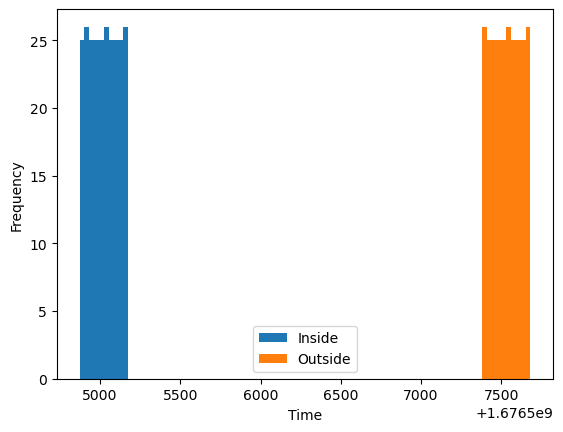

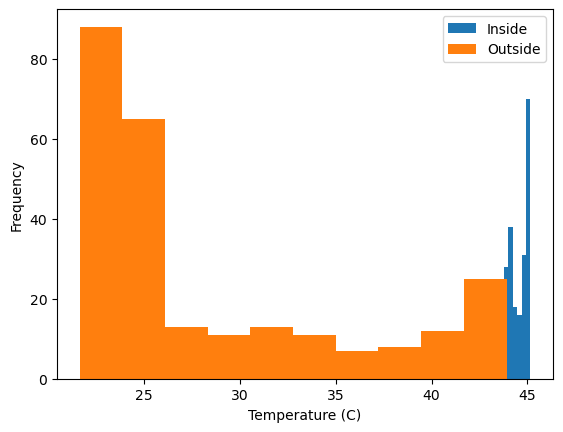

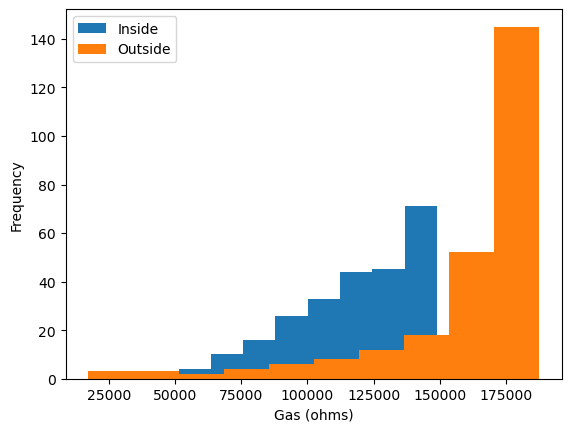

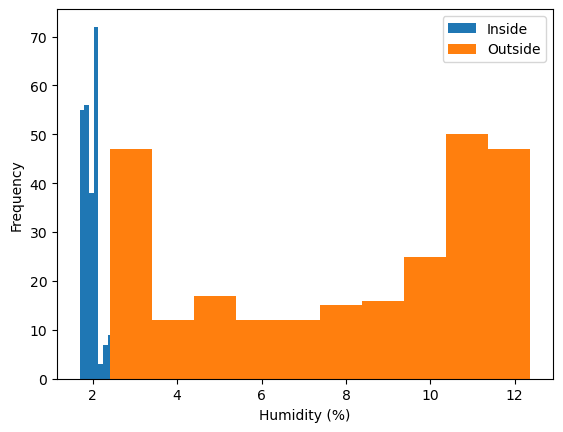

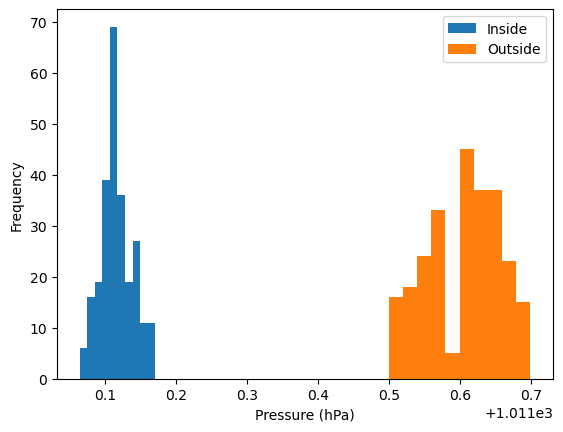

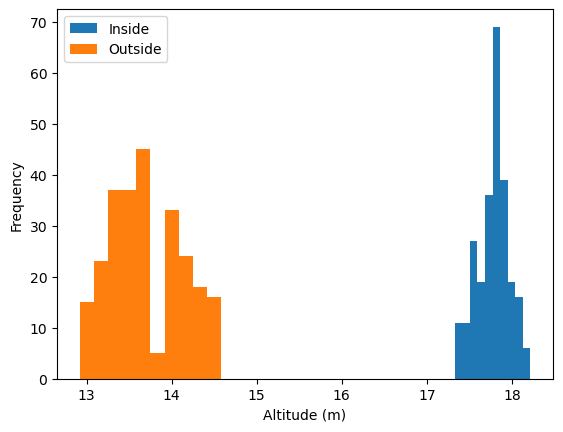

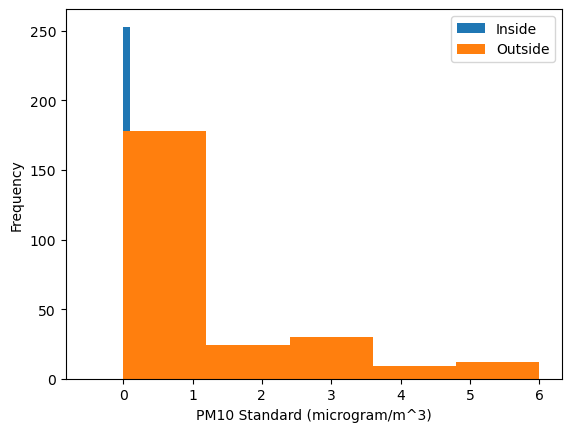

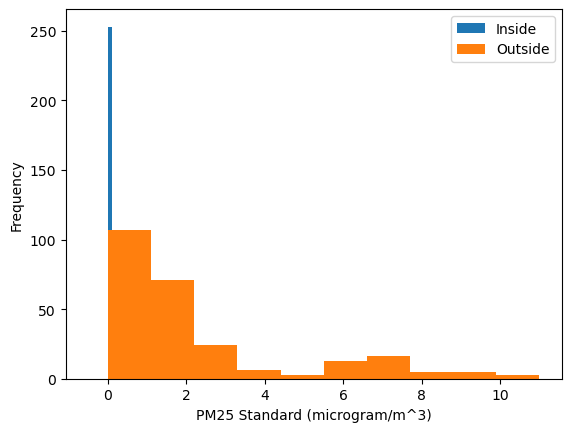

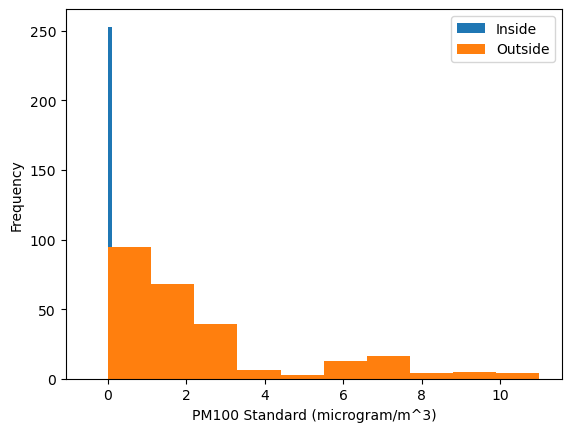

In [13]:
plt.hist(insideData["Time"], label="Inside")
plt.hist(outsideData["Time"], label="Outside")
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.legend()
plt.show()

plt.hist(insideData["Temperature (C)"], label="Inside")
plt.hist(outsideData["Temperature (C)"], label="Outside")
plt.ylabel('Frequency')
plt.xlabel('Temperature (C)')
plt.legend()
plt.show()

plt.hist(insideData["Gas (ohms)"], label="Inside")
plt.hist(outsideData["Gas (ohms)"], label="Outside")
plt.ylabel('Frequency')
plt.xlabel('Gas (ohms)')
plt.legend()
plt.show()

plt.hist(insideData["Humidity (%)"], label="Inside")
plt.hist(outsideData["Humidity (%)"], label="Outside")
plt.ylabel('Frequency')
plt.xlabel('Humidity (%)')
plt.legend()
plt.show()

plt.hist(insideData["Pressure (hPa)"], label="Inside")
plt.hist(outsideData["Pressure (hPa)"], label="Outside")
plt.ylabel('Frequency')
plt.xlabel('Pressure (hPa)')
plt.legend()
plt.show()

plt.hist(insideData["Altitude (m)"], label="Inside")
plt.hist(outsideData["Altitude (m)"], label="Outside")
plt.ylabel('Frequency')
plt.xlabel('Altitude (m)')
plt.legend()
plt.show()

plt.hist(insideData["PM10 Standard (mirogram/m^3)"], label="Inside")
plt.hist(outsideData["PM10 Standard (mirogram/m^3)"], label="Outside", bins=5)
plt.ylabel('Frequency')
plt.xlabel('PM10 Standard (microgram/m^3)')
plt.legend()
plt.show()

plt.hist(insideData["PM25 Standard (mirogram/m^3)"], label="Inside")
plt.hist(outsideData["PM25 Standard (mirogram/m^3)"], label="Outside")
plt.ylabel('Frequency')
plt.xlabel('PM25 Standard (microgram/m^3)')
plt.legend()
plt.show()

plt.hist(insideData["PM100 Standard (mirogram/m^3)"], label="Inside")
plt.hist(outsideData["PM100 Standard (mirogram/m^3)"], label="Outside")
plt.ylabel('Frequency')
plt.xlabel('PM100 Standard (microgram/m^3)')
plt.legend()
plt.show()

**Comment on your results**

As a rule, the outside data will have some inside data with it as it was recorded while we were walking to the outside port door from inside Etcheverry Hall.
For the time plot, we see that obviously the times of the outside data occurred after the inside data collection (as that is what literally occured). The shape of each graph is largely the same.
The temperature plots show that the inside temperature is more centralized than the outside temperature, which is skewed right (due to the walking outside), and generally, it seems the outside temperature was much colder than the inside temperature. Though the inside temperature could have just measured how hot the motherboard and circuits were getting.
The gas inside was more spread out than the gas outside, but is also overall lower than the gas outside. The graphs of both are skewed left.
Humidity is far more ranged outside than inside, with there virtually being no humidity inside, as opposed to outside, ranging from 4-12%. Outside is skewed left whereas inside data is very slightly skewed right.
Pressure inside is a little less than pressure outside, inside being around 1.111 x 10^3 hPa and outside being around 1.611 x 10^3 hPa, which are both around 1 atm of pressure. They both have a normal-ish shape, however the outside data just has a crater at 0.6+1.011e3 on the y-axis. 
The altitude graph looks the same as the pressure graph, however inside and outside data have switched places, with outside data having generally less altitude than the inside (which means that where we took the outside data is less high than the lab).
The general patterns of graph shapes (time being a block, gas being skewed left, pressure and altitude being the same shape) are upheld for both inside and outside data respectively. The deviations occur when it comes to PM standards.
All PM standard graphs for outside are skewed right, whereas all PM standard graphs for the inside are 0, which is probably because the inside has much better air quality than outside, where any random particle could be picked up by the sensor. Also, due to us placing the sensor in many places outside for short amounts of time, this could have also added to the momentary high sensor readings for the PM standards.

**Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement? What is your mean uncertainty? How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?**
Inside:
Time:
1676505022.2706802
87.08629180186902
Temp:
44.31354820281616
0.6666705355722945
Gas:
117165.7233201581
24844.247099464672
Humidity:
1.9783302939849738
0.23219233815054505
Pressure:
1011.1166266144236
0.0228090626197932
Altitude:
17.776953183582457
0.19022493818825575
PM10:
0
0
PM25:
0
0
PM100:
0
0

Outside:
Time:
1676507546.8845665
67.94115912957167
Temp:
25.990463018002714
4.518215029384407
Gas:
170522.98369565216
10288.955402082296
Humidity:
8.919791083627963
2.911056283127058
Pressure:
1011.6001447856146
0.05281940508020675
Altitude:
13.74524587717723
0.4403389391238763
PM10:
1.8967391304347827
1.325006241737267
PM25:
3.244565217391304
2.411470060863777
PM100:
3.4130434782608696
2.3917983679424664


Mean Uncertainty = std/sqrt(len(inside/outside))

**If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?**

I think we took enough data for the Central Limit Theorem to apply, it's just that the data, including data from the transition to inside and outside including movement outside as well and getting measurements from different areas outside led to non-Gaussian distributions in temperature, pressure, humidity, altitude, and all PM standards outside unlike inside. Time would never have gotten a Gaussian distribution, and the manner in which gas was skewed left in both sets of data makes me believe gas would also not be Gaussian.

### Step 5: Comparing sensors
- Get data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 4. Do the same comparing your outside data with their outside data.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

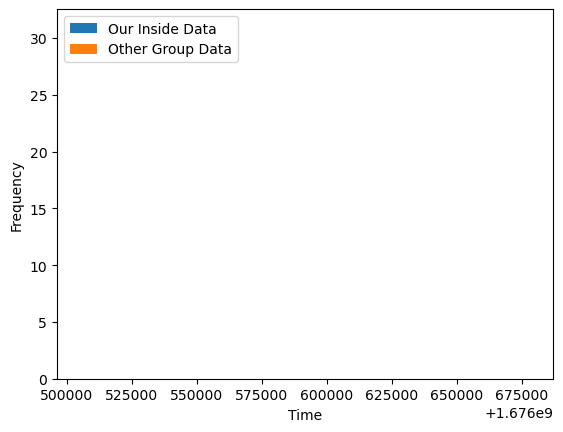

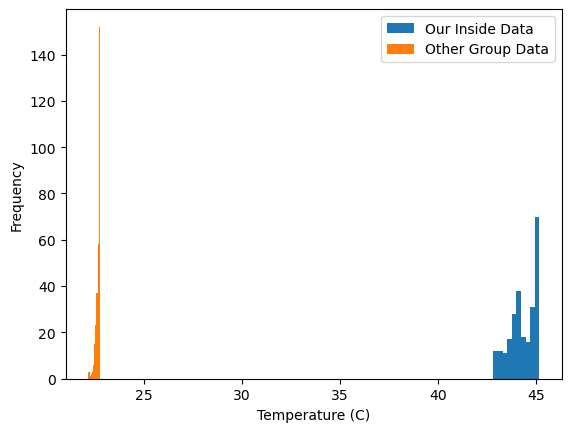

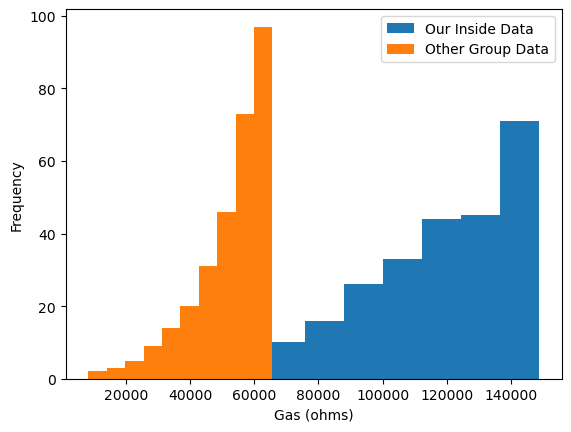

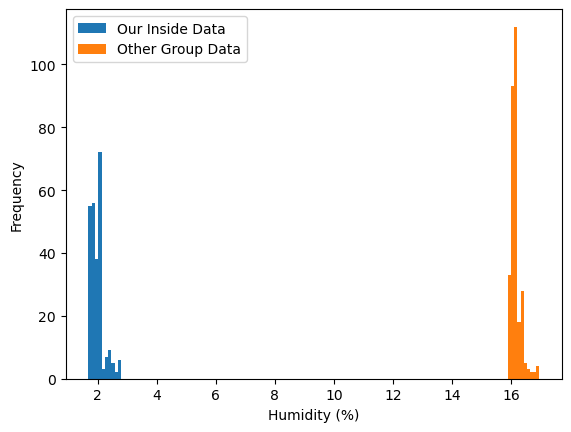

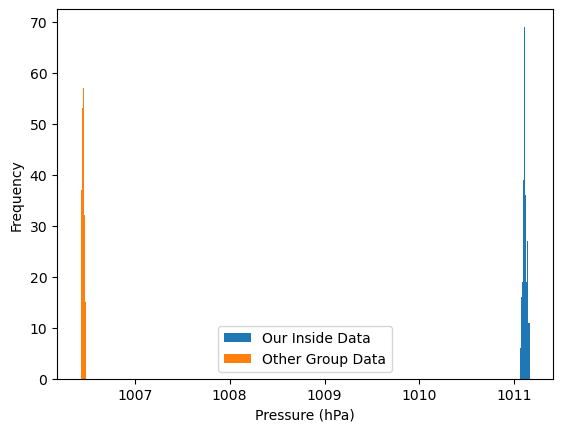

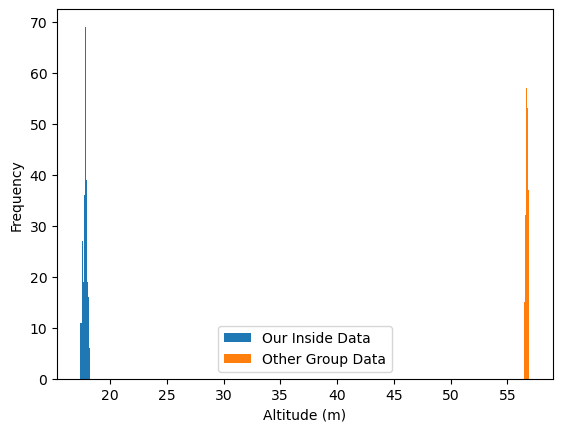

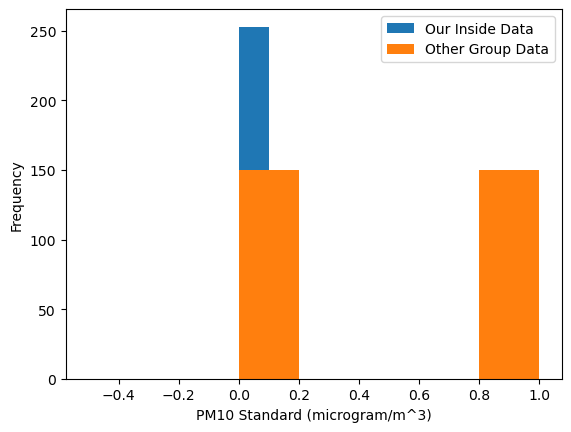

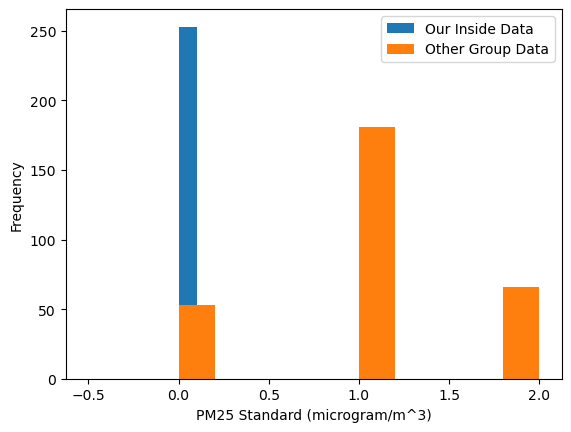

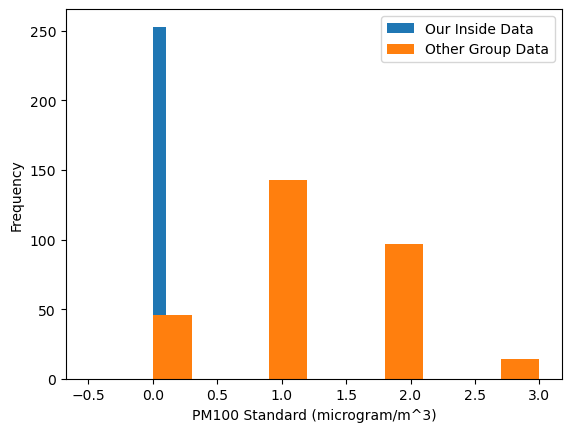

In [15]:
## THIS IS THE INSIDE DATA COMPARISON
#new csv input
data2inside = pd.read_csv(r"C:\Users\prana\Downloads\feb172023insidedata.csv")

# for some reason time just won't plot for outside or inside data, but that really shouldn't matter since the histograms of each would just show large blocks at different seconds anyway
plt.hist(insideData["Time"], label="Our Inside Data")
plt.hist(data2inside["time"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.legend()
plt.show()

plt.hist(insideData["Temperature (C)"], label="Our Inside Data")
plt.hist(data2inside["temperature"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Temperature (C)')
plt.legend()
plt.show()

plt.hist(insideData["Gas (ohms)"], label="Our Inside Data")
plt.hist(data2inside["gas"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Gas (ohms)')
plt.legend()
plt.show()

plt.hist(insideData["Humidity (%)"], label="Our Inside Data")
plt.hist(data2inside["humidity"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Humidity (%)')
plt.legend()
plt.show()

plt.hist(insideData["Pressure (hPa)"], label="Our Inside Data")
plt.hist(data2inside["pressure"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Pressure (hPa)')
plt.legend()
plt.show()

plt.hist(insideData["Altitude (m)"], label="Our Inside Data")
plt.hist(data2inside["altitude"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Altitude (m)')
plt.legend()
plt.show()

plt.hist(insideData["PM10 Standard (mirogram/m^3)"], label="Our Inside Data")
plt.hist(data2inside["Concentration Units (Standard) PM 1.0"], label="Other Group Data", bins=5)
plt.ylabel('Frequency')
plt.xlabel('PM10 Standard (microgram/m^3)')
plt.legend()
plt.show()

plt.hist(insideData["PM25 Standard (mirogram/m^3)"], label="Our Inside Data")
plt.hist(data2inside["Concentration Units (Standard) PM 2.5"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('PM25 Standard (microgram/m^3)')
plt.legend()
plt.show()

plt.hist(insideData["PM100 Standard (mirogram/m^3)"], label="Our Inside Data")
plt.hist(data2inside["Concentration Units (Standard) PM 10.0"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('PM100 Standard (microgram/m^3)')
plt.legend()
plt.show()

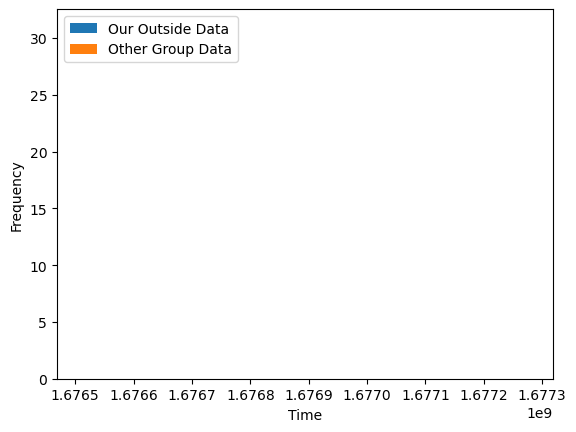

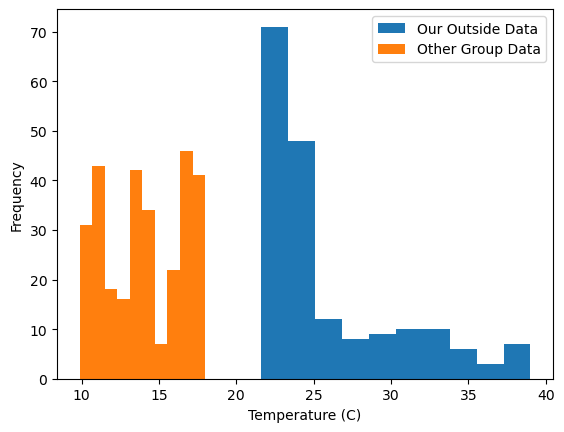

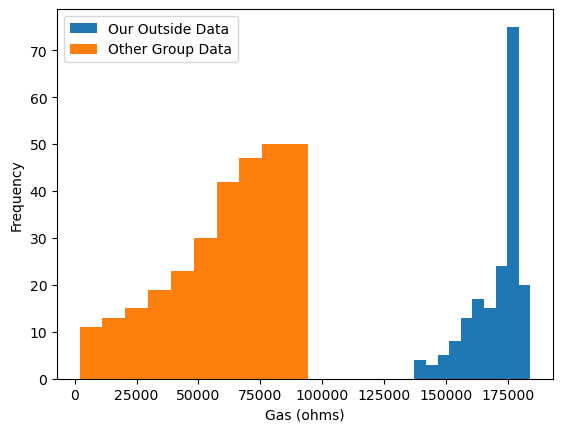

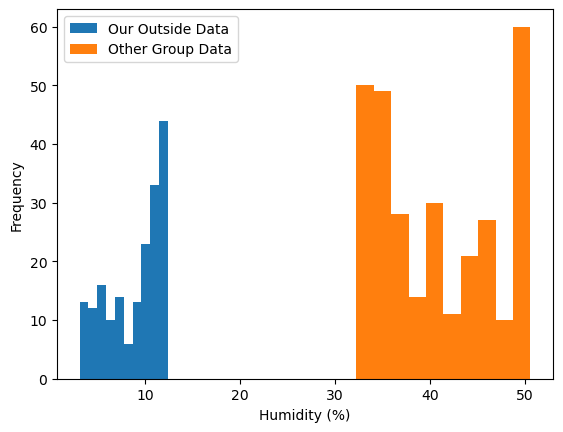

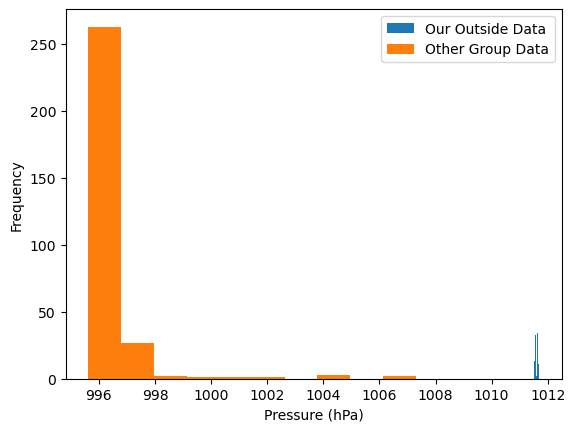

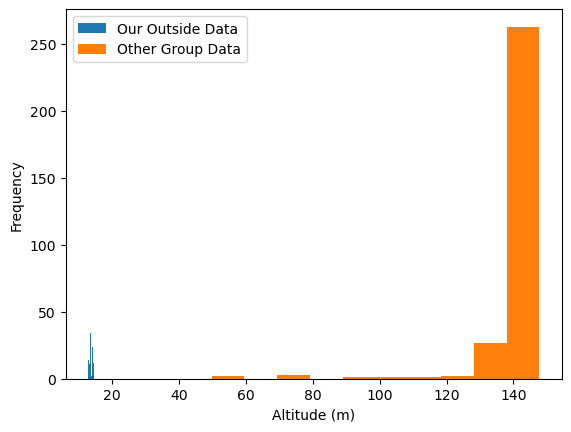

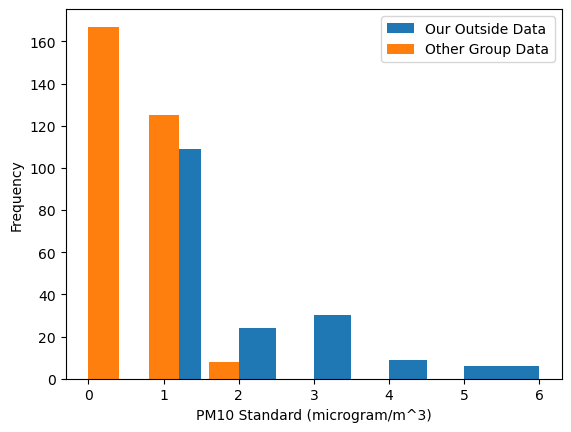

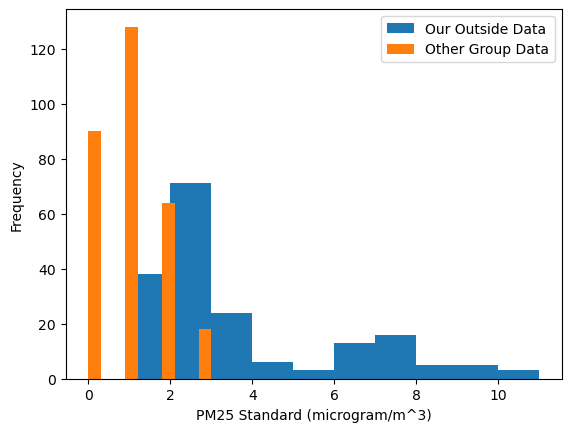

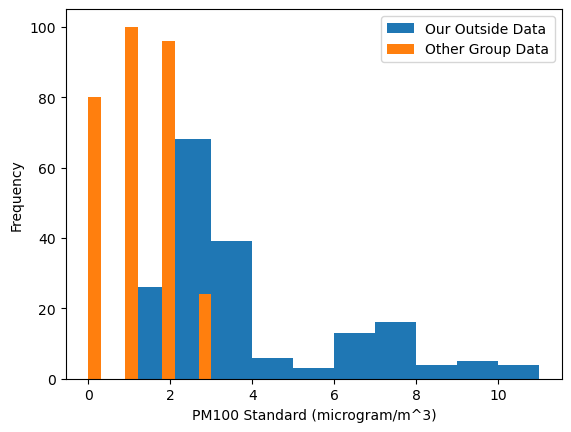

In [18]:
##THIS IS THE OUTSIDE DATA COMPARISON
##new csv
data2outside = pd.read_csv(r"C:\Users\prana\Downloads\feb242023outsidedata.csv")

plt.hist(pureOutside["Time"], label="Our Outside Data")
plt.hist(data2outside["time"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.legend()
plt.show()

plt.hist(pureOutside["Temperature (C)"], label="Our Outside Data")
plt.hist(data2outside["temperature"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Temperature (C)')
plt.legend()
plt.show()

plt.hist(pureOutside["Gas (ohms)"], label="Our Outside Data")
plt.hist(data2outside["gas"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Gas (ohms)')
plt.legend()
plt.show()

plt.hist(pureOutside["Humidity (%)"], label="Our Outside Data")
plt.hist(data2outside["humidity"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Humidity (%)')
plt.legend()
plt.show()

plt.hist(pureOutside["Pressure (hPa)"], label="Our Outside Data")
plt.hist(data2outside["pressure"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Pressure (hPa)')
plt.legend()
plt.show()

plt.hist(pureOutside["Altitude (m)"], label="Our Outside Data")
plt.hist(data2outside["altitude"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('Altitude (m)')
plt.legend()
plt.show()

plt.hist(pureOutside["PM10 Standard (mirogram/m^3)"], label="Our Outside Data")
plt.hist(data2outside["Concentration Units (Standard) PM 1.0"], label="Other Group Data", bins=5)
plt.ylabel('Frequency')
plt.xlabel('PM10 Standard (microgram/m^3)')
plt.legend()
plt.show()

plt.hist(pureOutside["PM25 Standard (mirogram/m^3)"], label="Our Outside Data")
plt.hist(data2outside["Concentration Units (Standard) PM 2.5"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('PM25 Standard (microgram/m^3)')
plt.legend()
plt.show()

plt.hist(pureOutside["PM100 Standard (mirogram/m^3)"], label="Our Outside Data")
plt.hist(data2outside["Concentration Units (Standard) PM 10.0"], label="Other Group Data")
plt.ylabel('Frequency')
plt.xlabel('PM100 Standard (microgram/m^3)')
plt.legend()
plt.show()

### Extra: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How might you quantify this?

- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.